<a href="https://colab.research.google.com/github/amanickam/pgaiml/blob/master/plant_seedlings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Import the libraries, load dataset, print shape of data, visualize the images in dataset. (5 Marks)


2. Data Pre-processing: (15 Marks)
          a. Normalization.
          b. Gaussian Blurring.
          c. Visualize data after pre-processing. bold text

 3. Make data compatible: (10 Marks)
        a. Split the dataset into training, testing, and validation set.
          (Hint: First split train images and train labels into training and testing set with test_size = 0.3. Then further split test data into test and validation set with test_size = 0.5)
          [Read the note at the end of the problem statement for the reason behind using the train images for using for training and testing set.]
        b. Reshape data into shapes compatible with Keras models.
        c. Convert labels from digits to one hot vectors.
        d. Print the label for y_train[0].

In [42]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

In [43]:

image_size = 128
batch_size = 32

In [44]:
idg = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    #rotation_range=20, # You can uncomment these parameters to make you generator rotate & flip the images to put the train model in stricter conditions.
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2
)

In [45]:
train_gen = idg.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/CNN Project/plant-seedlings-classification/train',
                                                    target_size=(image_size, image_size),
                                                    subset='training',
                                                    class_mode='categorical',
                                                    batch_size=batch_size,
                                                    shuffle=True,
                                                    seed=1
                                                )

Found 3509 images belonging to 12 classes.


In [46]:
val_gen = idg.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/CNN Project/plant-seedlings-classification/train',
                                                   target_size=(image_size, image_size),                                                   
                                                   subset='validation',
                                                   class_mode='categorical',
                                                   batch_size=batch_size,
                                                   shuffle=True,
                                                   seed=1
                                                )

Found 872 images belonging to 12 classes.


In [ ]:
test_gen =  idg.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/CNN Project/plant-seedlings-classification/train/test',
                                                   target_size=(image_size, image_size),                                                   
                                                   subset='validation',
                                                   class_mode='categorical',
                                                   batch_size=batch_size,
                                                   shuffle=True,
                                                   seed=1
                                                )

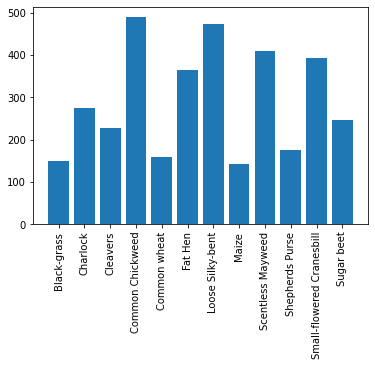

In [47]:
unique, counts = np.unique(train_gen.classes, return_counts=True)
dict1 = dict(zip(train_gen.class_indices, counts))

keys = dict1.keys()
values = dict1.values()

plt.xticks(rotation='vertical')
bar = plt.bar(keys, values)

In [48]:
type(train_gen)

tensorflow.python.keras.preprocessing.image.DirectoryIterator

In [49]:
x,y = next(train_gen)

In [81]:
x.shape

(32, 128, 128, 3)

In [82]:
y.shape

(32, 12)

In [63]:
x_val,y_val=next(val_gen)

In [50]:
from mpl_toolkits.axes_grid1 import ImageGrid

def show_grid(image_list, nrows, ncols, label_list=None, show_labels=False, figsize=(10,10)):

    fig = plt.figure(None, figsize,frameon=False)
    grid = ImageGrid(fig, 111, 
                     nrows_ncols=(nrows, ncols),  
                     axes_pad=0.2, 
                     share_all=True,
                     )
    for i in range(nrows*ncols):
        ax = grid[i]
        ax.imshow(image_list[i],cmap='Greys_r')
        ax.axis('off')

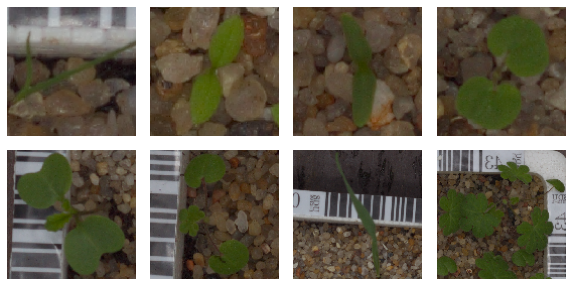

In [51]:
show_grid(x,2,4,show_labels=True,figsize=(10,10))

4. Building CNN: (15 Marks)
        a. Define layers.
        b. Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.)

In [52]:
model = tf.keras.models.Sequential()

# Input layer
# Can be omitted, you can specify the input_shape in other layers
model.add(tf.keras.layers.InputLayer(input_shape=(image_size,image_size,3,)))

# Here we add a 2D Convolution layer
# Check https://keras.io/api/layers/convolution_layers/convolution2d/ for more info
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))

# Max Pool layer 
# It downsmaples the input representetion within the pool_size size
model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2)))

# Normalization layer
# The layer normalizes its output using the mean and standard deviation of the current batch of inputs.
model.add(tf.keras.layers.BatchNormalization())

# 2D Convolution layer
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), strides = (1,1), activation='relu'))

# Max Pool layer 
model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2)))

# Normalization layer
model.add(tf.keras.layers.BatchNormalization())

# 2D Convolution layer
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), strides = (1,1), activation='relu'))

# Max Pool layer 
model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2)))

# Normalization layer
model.add(tf.keras.layers.BatchNormalization())

# 2D Convolution layer
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), strides = (1,1), activation='relu'))

# Max Pool layer 
model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2)))

# Global Max Pool layer
model.add(tf.keras.layers.GlobalMaxPool2D())

# Dense Layers after flattening the data
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation='relu'))

# Dropout
# is used to nullify the outputs that are very close to zero and thus can cause overfitting.
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(64, activation='relu'))

# Normalization layer
model.add(tf.keras.layers.BatchNormalization())

#Add Output Layer
model.add(tf.keras.layers.Dense(12, activation='softmax')) # = 12 predicted classes

In [53]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [54]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 126, 126, 64)      1792      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 63, 63, 64)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 63, 63, 64)        256       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 61, 61, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 30, 30, 64)        256       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 128)      

In [55]:
# You can save the best model to the checkpoint
checkpoint = tf.keras.callbacks.ModelCheckpoint('plant_classifier.h5', #where to save the model
                                                    save_best_only=True, 
                                                    monitor='val_accuracy', 
                                                    mode='max', 
                                                    verbose = 1)

*5*. Fit and evaluate model and print confusion matrix. (10 Marks)bold text

In [57]:
history = model.fit(train_gen,
          epochs=15, # Increase number of epochs if you have sufficient hardware
          steps_per_epoch= 3509//batch_size,  # Number of train images // batch_size
          validation_data=val_gen,
          validation_steps = 872//batch_size, # Number of val images // batch_size
          callbacks = [checkpoint],
          verbose = 1
)

Epoch 1/15
109/109 [==============================] - 192s 2s/step - loss: 0.6700 - accuracy: 0.7696 - val_loss: 3.8233 - val_accuracy: 0.2130

Epoch 00001: val_accuracy improved from 0.13657 to 0.21296, saving model to plant_classifier.h5
Epoch 2/15
109/109 [==============================] - 197s 2s/step - loss: 0.5717 - accuracy: 0.8050 - val_loss: 1.2416 - val_accuracy: 0.5498

Epoch 00002: val_accuracy improved from 0.21296 to 0.54977, saving model to plant_classifier.h5
Epoch 3/15
109/109 [==============================] - 192s 2s/step - loss: 0.5252 - accuracy: 0.8225 - val_loss: 0.9934 - val_accuracy: 0.6412

Epoch 00003: val_accuracy improved from 0.54977 to 0.64120, saving model to plant_classifier.h5
Epoch 4/15
109/109 [==============================] - 191s 2s/step - loss: 0.4549 - accuracy: 0.8395 - val_loss: 0.5483 - val_accuracy: 0.8218

Epoch 00004: val_accuracy improved from 0.64120 to 0.82176, saving model to plant_classifier.h5
Epoch 5/15
109/109 [====================

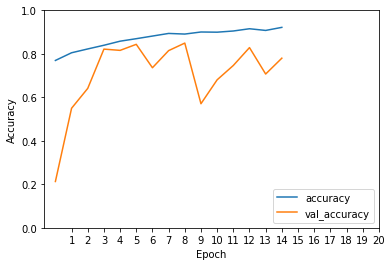

In [59]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(list(range(1,21)))
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [77]:
# Predict the values from the validation dataset
Y_pred = model.predict(x_val)

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
plt.subplots(figsize=(22,7)) #set the size of the plot 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(x_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(x_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

In [ ]:
6. Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]. (5 Marks)

In [66]:
# in the absemnce of test image, using the below image as test image

maize = cv2.imread('/content/drive/MyDrive/Colab Notebooks/CNN Project/plant-seedlings-classification/train/Maize/6e9ff31e7.png')



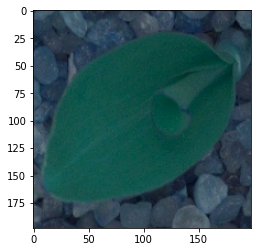

In [67]:
plt.imshow(maize)

In [68]:
maize = cv2.resize(maize, (128,128))

In [69]:
maize_batch = np.expand_dims(maize, axis=0)

In [70]:
conv_maize = model.predict(maize_batch)

In [71]:
conv_maize.shape

(1, 12)

In [72]:
def visualize(maize_batch):
    maize = np.squeeze(maize_batch, axis=0)
    print(maize.shape)
    plt.imshow(maize)

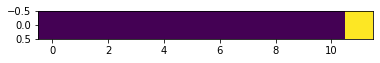

In [73]:
plt.imshow(conv_maize)

In [74]:
simple_model = tf.keras.models.Sequential()
simple_model.add(tf.keras.layers.Conv2D(1,3,3,input_shape=maize.shape)) # 3x3 kernel

In [75]:
# Function to show the mask of the image (aka how the model sees the image)
def visualize_color(simple_model, maize):
    maize_batch = np.expand_dims(maize, axis=0)
    conv_maize2 = simple_model.predict(maize_batch)
    conv_maize2 = np.squeeze(conv_maize2, axis=0)
    
    print(conv_maize2.shape)
    conv_maize2 = conv_maize2.reshape(conv_maize2.shape[:2])
    print(conv_maize2.shape)
    plt.imshow(conv_maize2)

(42, 42, 1)
(42, 42)


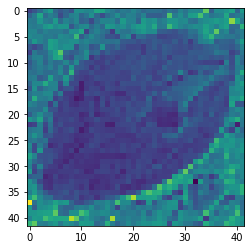

In [76]:
visualize_color(simple_model, maize)